# Задачи

1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

Описание данных

Имеются следующие данные:

1. date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
2. name – имя пользователя
3. transaction – статус транзакции
4. minute* – сколько минут прошло с начала дня

# Задача 1

1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
#импортируем необходимые библиотеки
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#читаем данные файлов, сохраняем в переменные
df   = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-itaev-23/mini_project_4/transaction_data.csv')
df_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-itaev-23/mini_project_4/transaction_data_updated.csv')

In [4]:
df.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
 3   minute       5315 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 166.2+ KB


In [5]:
# формат даты был object, приводим его к формату даты
df['date'] = pd.to_datetime(df['date'])
df_2['date'] = pd.to_datetime(df_2['date'])

In [6]:
df.info() #проверяем изменения 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


# Задача 2

2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [7]:
# сгруппированы данные столбца transaction (вид операции)
# посчитано количество операций
# переименова результирующая колонка
# отсортированы данные по убыванию
df_transaction =  df.groupby('transaction', as_index=False) \
                    .agg({'name': 'count'}) \
                    .rename(columns={'name': 'transaction_count'}) \
                    .sort_values('transaction_count', ascending=False)

In [8]:
df_transaction

,transaction,transaction_count
2,successfull,3692
0,cancelled,1619
1,error,4


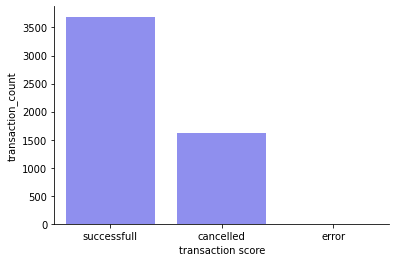

In [9]:
# визуализируем данные распределения количества операций
ax = sns.barplot(x='transaction', y='transaction_count', data=df_transaction, color='blue', alpha=0.5)
ax.set(xlabel='transaction score', ylabel='transaction_count')
sns.despine()  # убрать часть рамки графика
plt.show()

# Задача 3

3. Сколько транзакций завершились ошибкой?

In [10]:
df_transaction.query('transaction == "error"')

,transaction,transaction_count
1,error,4


# Задача 4

4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [11]:
# вывели средние значения и описательную статистику
df.query('transaction == "successfull"').name.value_counts().describe().round(0)

count    56.0
mean     66.0
std       8.0
min      46.0
25%      61.0
50%      64.0
75%      72.0
max      82.0
Name: name, dtype: float64

In [12]:
# отфильтрованы данные по успешным операциям
# сгруппированы данные по клиентам
# посчитано количество операций, отсортировано по возрастанию
# переименована колонка в результирующей таблице
df_successfull = df.query('transaction == "successfull"') \
    .groupby('name', as_index=False) \
    .agg({'transaction':'count'}) \
    .rename(columns={'transaction': 'count_transaction'}) \
    .sort_values('count_transaction')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


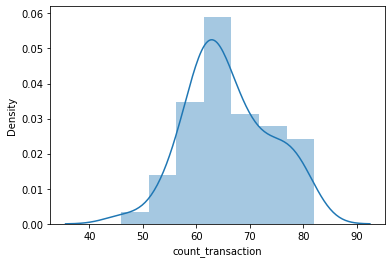

In [13]:
# визуализировано распределение количества успешных операций
sns.distplot(df_successfull.count_transaction)

# Задача 5

5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [14]:
df_2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [15]:
# подготавливаем данные к сводной таблице
# группируем по имени и минутам, считаем количество операций, переименовываем агрегированную колонку
df_pivot = df_2.groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .rename(columns={'transaction': 'value'})

In [27]:
df_pivot.head()

,name,minute,value
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [17]:
# формируем сводную таблицу, где строки - минуты, столбцы - имена, значения - кол-во операций
# заменяем пустые ячейки нулями
user_vs_minute_pivot = df_pivot.pivot(index='minute', columns='name', values='value').fillna(0)

In [18]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [23]:
#формируем таблицу для визуализации данных числа операций по времени
df_minutes = df_pivot.groupby('minute', as_index=False) \
        .agg({'value': 'sum'})

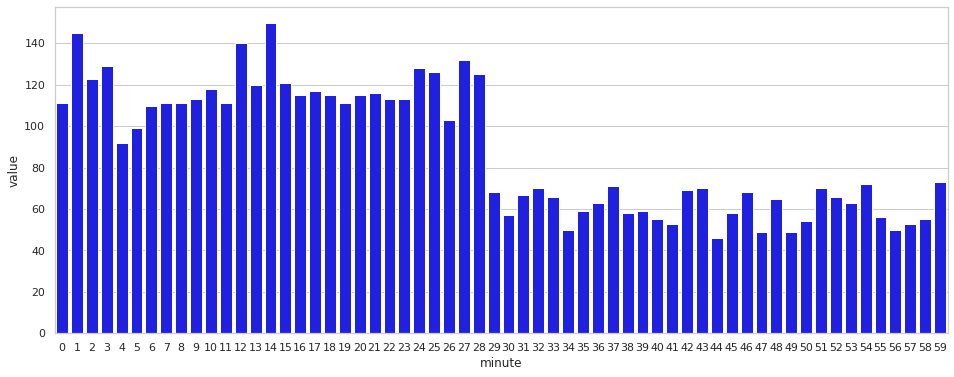

In [28]:
# визуализируем полученые данные
plt.figure(figsize=(16, 6))
sns.barplot(x='minute', y='value', data=df_minutes, color='blue')

# Задача 6

6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.

In [ ]:
# по графику мы видим, что данные извлекли только минутную часть времени, а не количество минут с начала дня
# исправим ситуацию в следующем шаге

# Задача 7

7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [30]:
# копируем обновленные данные
total_min_data = df_2

In [31]:
total_min_data.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [37]:
# добавляем новый столбец, в котором будут данные о минутах с начала дня
# сначала извлекаем часы, умножаем их на 60, а затем прибовляем минутную часть времени
total_min_data['true_minute'] = total_min_data.date.dt.hour * 60 + total_min_data.minute
total_min_data

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [39]:
# группируем по минутам, считаем количество операций, сортируем по возрастанию минут
df_3 = total_min_data.groupby('true_minute', as_index=False) \
              .agg({'transaction': 'count'}) \
              .sort_values('true_minute')
df_3

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


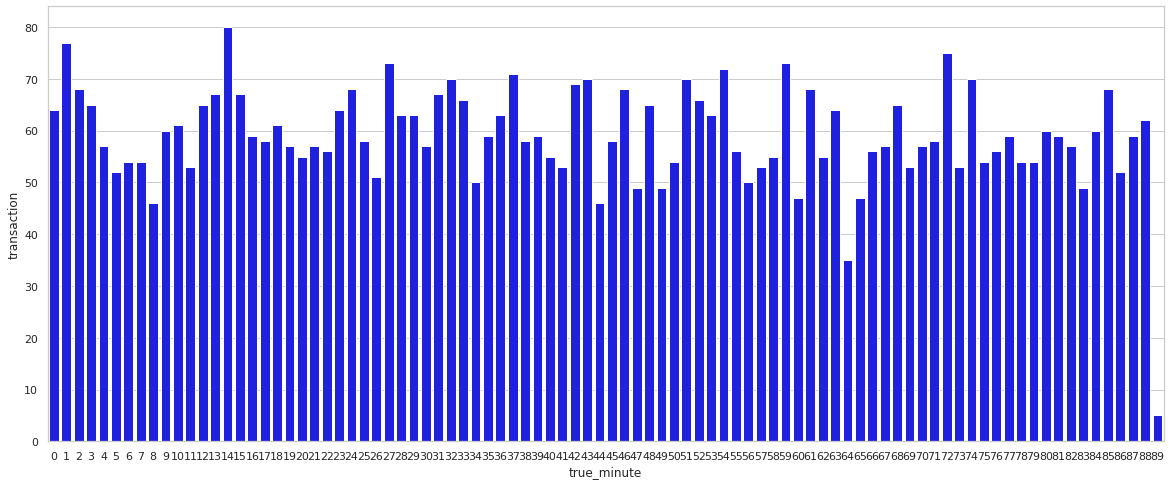

In [45]:
# визуализируем полученые данные
plt.figure(figsize=(20, 8))
sns.barplot(x='true_minute', y='transaction', data=df_3, color='blue')

In [46]:
# исправили ошибку в данных, теперь минуты отражены с начала дня